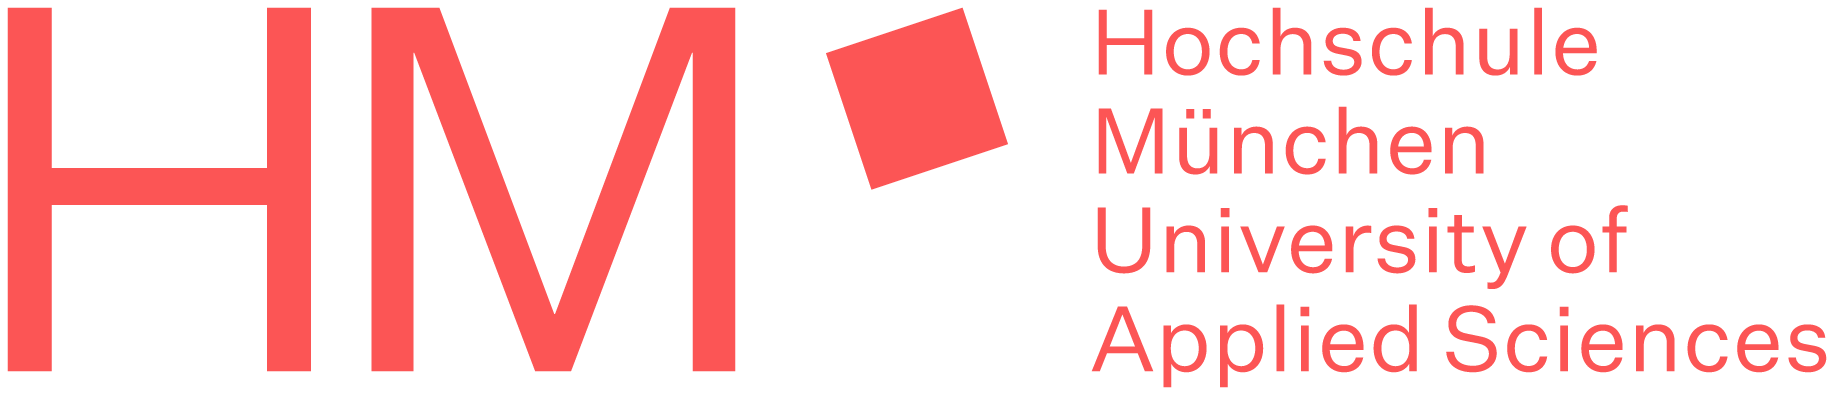

<p style="font-size:19px; text-align:left; margin-top: 15px; margin-bottom: 5px">Programmieraufgaben zum Kurs
<p style="font-size:25px; text-align:left; margin-bottom: 15px"><b>Wahrscheinlichkeitsrechnung und Statistik</b></p>

<h1 style="font-size:18px; font-weight:bold; margin-top: 15px;">Übungsblatt 4, Aufgabe 1 b)</h1>
<hr style="width:1.5px solid black; margin-bottom: 15px;"> </hr>

**Bestimmen und skizzieren Sie die empirische Verteilungsfunktion der Zahlen `1, 0, 1, 0, 2, 1, 1, 0, 1, 1` (per Hand oder etwa in $\texttt{R}$ unter Verwendung der Funktion `ecdf`).**

Zunächst speichern wir die in der Aufgabenstellung gegebenen Zahlen in einer eigenen Variable ab. Dazu verwenden wir die $\texttt{R}$-Funktion `c` zum kombinieren der einzelnen Werte.

In [1]:
# speichere die gegebenen Zahlen in der Variable z
z <- c(1,0,1,0,2,1,1,0,1,1)

Anschließend verwenden wir die in $\texttt{R}$ bereits vorgefertigte Funktion `ecdf` zur Bestimmung der empirischen Verteilungsfunktion der gegebenen Werte.

In [2]:
# erzeuge die zugehörigen emp. Verteilungsfunktion
F_n_hat <- ecdf(z)

Bevor wir schließlich die empirische Verteilungsfunktion der gegebenen Werte plotten, platzieren wir noch zwei Code-Zeilen zur Verbesserung der Ästhetik des späteren Plots. Der anschließende Code ergibt letztlich den in der Aufgabenstellung gewünschten Plot der Verteilungsfunktion der gegebenen Werte.

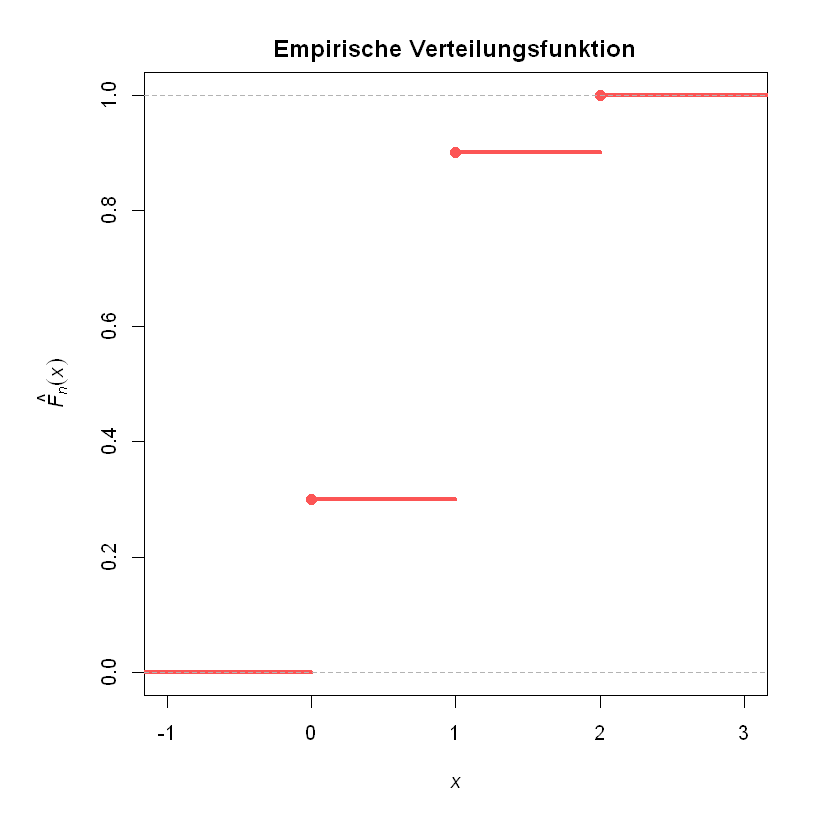

In [3]:
# Verbreiterung der Plot-Ränder
par(mar=c(5,5,2,2), oma=c(1,1,1,1))

# speichere die Farbe der Hochschule München in hm_red
hm_red <- rgb(252,85,85,maxColorValue=255)

# plotte die oben erzeugte emp. Verteilungsfunktion
plot(F_n_hat,
     main="Empirische Verteilungsfunktion",
     xlab=expression(italic(x)),
     ylab=expression(italic(hat(F)[n](x))),
     col=hm_red,
     col.hor=hm_red,
     cex=1.2,  # vergrößere die Punkte
     lwd=3.2)  # vergrößere die Liniendicke

<h1 style="font-size:18px; font-weight:bold; margin-top: 15px;">Übungsblatt 4, Aufgabe 1 c)</h1>
<hr style="width:1.5px solid black; margin-bottom: 15px;"> </hr>

**Erzeugen Sie 100 (1000, 10000) Zufallszahlen gemäß der Verteilung der Zufallsvariablen $\bm{X}$ (in $\texttt{R}$ beispielsweise mittels `sample(x=c(0,1,2), size=100, replace=TRUE, prob=c(1/4,2/3,1/12))` und plotten Sie die empirische Verteilungsfunktion von diesen Zahlen. Erkennen Sie eine Konvergenz der empirischen Verteilungsfunktionen?**

Für die späteren Konvergenzbetrachtungen wird eine Grenzfunktion benötigt. Wir konstruieren uns dafür die Verteilungsfunktion von $X$ in $\texttt{R}$ künstlich dadurch, dass wir die Funktion `ecdf` auf geeignete Werte anwenden. 

In [4]:
# erzeuge (künstlich) die Verteilungsfunktion F_X von X
F_X <- ecdf(c(0,0,0,1,1,1,1,1,1,1,1,2))

Wenn Zufallszahlen erzeugt werden, so variieren diese naturgemäß bei jedem Aufruf. Um die Reproduzierbarkeit der nachfolgenden Ergebnisse und Plots sicherzustellen, setzen wir einen Seed, welcher die Werte der Zufallszahlen verankert.

In [5]:
# setze einen Seed zum Zwecke der Reproduzierbarkeit
set.seed(1234)

Nun erzeugen wir uns 100, 1000 sowie 10000 Zufallszahlen gemäß der Verteilung von $X$ und bestimmen jeweils die zugehörige empirische Verteilungsfunktion.

In [6]:
# erzeuge die empirischen Verteilungsfunktion zu 100,
# 1000 und 10000 gemäß X verteilter Zufallszahlen
F_100_hat   <- ecdf(sample(x=c(0,1,2), size=100,   replace=TRUE, prob=c(1/4,2/3,1/12)))
F_1000_hat  <- ecdf(sample(x=c(0,1,2), size=1000,  replace=TRUE, prob=c(1/4,2/3,1/12)))
F_10000_hat <- ecdf(sample(x=c(0,1,2), size=10000, replace=TRUE, prob=c(1/4,2/3,1/12)))

Schließlich plotten wir die eben erzeugten empirischen Verteilungsfunktionen zusammen mit der eingangs erzeugten Verteilungsfunktion von $X$.

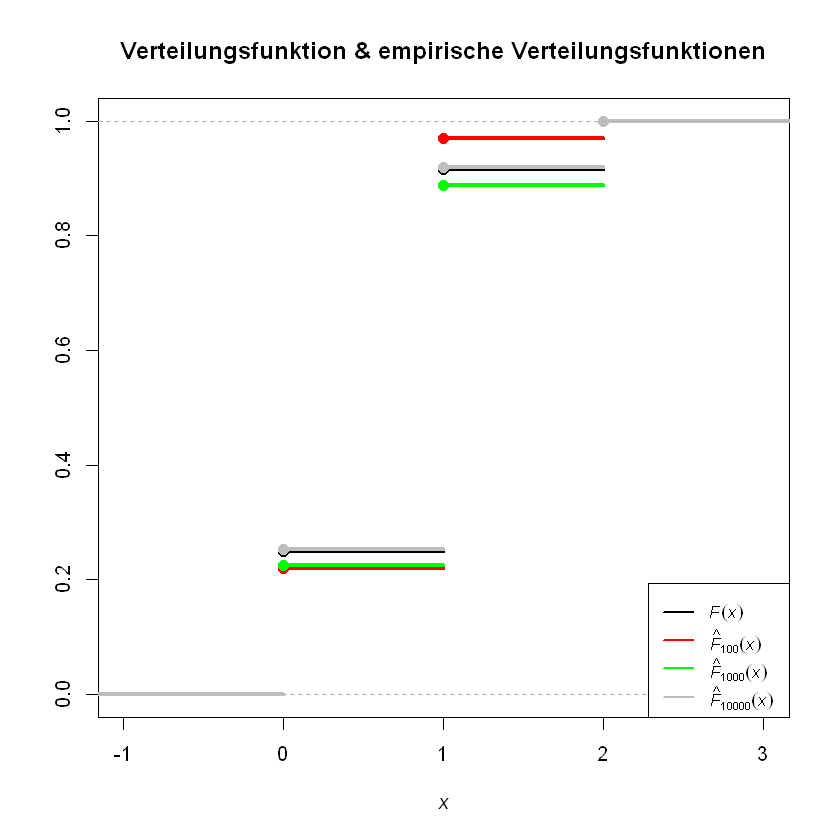

In [7]:

# plotte die oben erzeugte emp. Verteilungsfunktion
plot(F_X,
     main="Verteilungsfunktion & empirische Verteilungsfunktionen",
     xlab=expression(italic(x)), ylab="",
     col="black", col.hor="black", cex=1.2, lwd=3.2)
lines(F_100_hat,   col="red",   col.hor="red",
      cex=1.2, lwd=3.2)
lines(F_1000_hat,  col="green", col.hor="green",
      cex=1.2, lwd=3.2)
lines(F_10000_hat, col="grey",  col.hor="grey",
      cex=1.2, lwd=3.2)

# erzeuge eine Legende zum Plot
legend("bottomright",
       legend=c(expression(italic(F(x))),
                expression(italic(hat(F)[100](x))),
                expression(italic(hat(F)[1000](x))),
                expression(italic(hat(F)[10000](x)))),
       col=c("black", "red", "green", "grey"),
       lty=1, cex=0.8, lwd=2)


Visuell lässt sich erkennen, dass die empirischen Verteilungsfunktionen bei wachsender Anzahl an gegebenen Daten in einem gewissen Sinne gegen die Verteilungsfunktion $F_X$ konvergieren.

<h1 style="font-size:18px; font-weight:bold; margin-top: 15px;">Übungsblatt 9, Aufgabe 4 a)</h1>
<hr style="width:1.5px solid black; margin-bottom: 15px;"> </hr>

Eine mögliche Implementierung des empirischen Korrelationskoeffizienten ist wie folgt gegeben:

In [8]:
# Funktion zur Bestimmung des empirischen Korrelationskoeffizienten zweier Zahlenfolgen x und y
empKorrKoeffizient <- function(x,y) {
  
  # Falls die Zahlenfolgen x und y unterschiedlich lang sind, so gebe einen Fehler aus
  if (length(x) != length(y)) {
    stop("Zahlenfolgen unterschiedlich lang")
  }

  # Speichere die Länge der Zahlenfolgen x (und y) in N
  N <- length(x)
  
  # Bestimme die empirischen Mittelwerte der Zahlenfolgen x und y
  mu_hut_x <- mean(x)
  mu_hut_y <- mean(y)
  
  # Bestimme die empirischen Standardabweichungen der Zahlenfolgen x und y
  sigma_hut_x <- sd(x)  # alternativ: sigma_hat_x <- sqrt(var(x))
  sigma_hut_y <- sd(y)  # alternativ: sigma_hat_y <- sqrt(var(y))
  
  # Bestimme den empirischen Korrelationskoeffizienten der Zahlenfolgen x und y
  rho_hut <- 1/(N-1)*sum((x-mu_hut_x)*(y-mu_hut_y)) / (sigma_hut_x*sigma_hut_y)
  
  # Gebe den eben bestimmen empirischen Korrelationskoeffizienten zurück
  return(rho_hut)
}

Der obige Code ist (im Wesentlichen) eine Reimplementierung der in *R* bereits vorgefertigten Funktion `cor` (mit optionalem Argument `method="pearson"`).

<h1 style="font-size:18px; font-weight:bold; margin-top: 15px;">Übungsblatt 9, Aufgabe 4 b)</h1>
<hr style="width:1.5px solid black; margin-bottom: 15px;"> </hr>

Wir schreiben zunächst die gegebenen Zahlenfolgen in Variablen und bestimmen dann entweder mittels der in Teilaufgabe a) angefertigten Funktion `empKorrelationskoeffizient` oder mittels der in *R* bereits vorgefertigten Funktion `cor` den empirischen Korrelationskoeffizienten der Zahlenfolgen:

In [9]:
# Speichere die gegebenen Zahlenfolgen in x und y
x <- c(174.9, 175.2, 164.5, 171.5, 171.4, 168.6, 172.9, 169.2, 165.7, 178.1, 164.4, 173.6)
y <- c( 66.2,  62.1,  40.7,  55.6,  62.3,  58.6,  53.1,  59.8,  47.3,  61.8,  51.5,  57.6)

# Berechne den empirischen Korrelationskoeffizienten
print(paste("Empirischer Korrelationskoeffizient via 'empKorrKoeffizient': ", empKorrKoeffizient(x,y)))
print(paste("Empirischer Korrelationskoeffizient via 'cor':                ", cor(x,y,method="pearson")))

[1] "Empirischer Korrelationskoeffizient via 'empKorrKoeffizient':  0.766346852990117"
[1] "Empirischer Korrelationskoeffizient via 'cor':                 0.766346852990117"


Anschließend plotten wir die gegebenen Zahlenpaare sowie die mittels linearer Regression erhaltene Ausgleichsgerade:

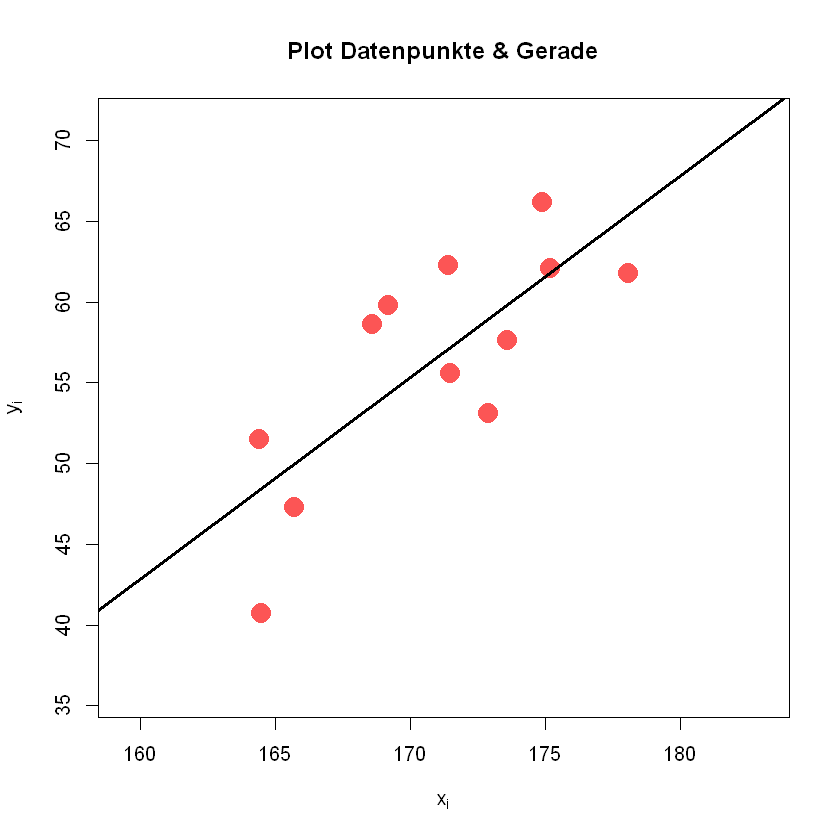

In [10]:
# Berechne die Werte a* und b* gemäß der angegebenen Formeln und gebe sie aus
a_stern <- empKorrKoeffizient(x,y)*sd(y)/sd(x)
b_stern <- mean(y) - a_stern*mean(x)

# Erzeuge einen Plot auf Basis der gegebenen Zahlenpaare x und y
plot(x,y,
     pch=16,                            # Darstellung über Kreise
     col=rgb(252,85,85,max=255),        # Farbe der Hochschule München
     cex=2.25,                          # Punktgröße 2.25
     xlim=c(min(x)-5,max(x)+5),         # Werte der x-Achse
     ylim=c(min(y)-5,max(y)+5),         # Werte der y-Achse
     main="Plot Datenpunkte & Gerade",  # Titel des Plots
     xlab=expression("x"[i]),           # Beschriftung der x-Achse
     ylab=expression("y"[i]))           # Beschriftung der y-Achse

# Setze in obigen Plot die Gerade mit Parametern a* und b*
abline(b_stern,a_stern,                 # auf Reihenfolge achten
       col="black",                   # Farbe schwarz
       lwd=3)                           # Linienbreite 3